In [1]:
import pltutils as pltu
import numpy as np
from keras import layers
from keras.layers import Conv2D, Activation, Add, Flatten, Dense, Input, Reshape, MaxPooling2D
from keras.models import Model,Sequential
from keras.datasets import cifar10
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
train = x_train/255.
test = x_test/255.
cls_train = y_train
cls_test = y_test
cat_train = np_utils.to_categorical(y_train, num_classes=10)
cat_test = np_utils.to_categorical(y_test, num_classes=10)
train.shape

(50000, 32, 32, 3)

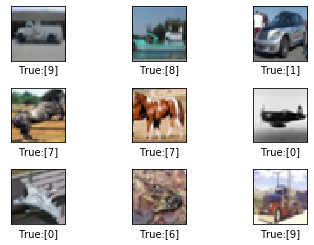

In [3]:
start = 110
end = start+10
pltu.plot_images(train[start:end],cls_train[start:end])

In [4]:
def ResidualBlock(filters, input_shape=(28,28,1)):
    X_input = Input(input_shape)
    X_shortcut = Conv2D(filters,(1,1), padding='same')(X_input)
    X = X_input
    X = Conv2D(filters,(3,3), padding='same')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters,(3,3), padding='same')(X)
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    model = Model(inputs=X_input, outputs=X)
    return model


In [32]:
def ResNet():
    X_input = Input((32,32,3))
    X = Reshape((32,32,3),input_shape=(32,32,3))(X_input)
    X = ResidualBlock(16, input_shape=(32,32,3))(X)
    
    X = MaxPooling2D((2,2))(X)
    X = ResidualBlock(32, input_shape=(16,16,16))(X)
    
    X = MaxPooling2D((2,2))(X)
    X = ResidualBlock(64, input_shape=(8,8,32))(X)
    
#     X = MaxPooling2D((2,2))(X)
#     X = ResidualBlock(128, input_shape=(4,4,64))(X)
    
    #X = MaxPooling2D((2,2))(X)
    X = Flatten()(X)
    X = Dense(1000, activation='relu')(X)
    X = Dense(10,activation='softmax')(X)
    model = Model(inputs=X_input, outputs=X)
   
    #model = Sequential()
    return model
    

In [33]:
model = ResNet()
model.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
model_15 (Model)             (None, 32, 32, 16)        2832      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
model_16 (Model)             (None, 16, 16, 32)        14432     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
model_17 (Model)             (None, 8, 8, 64)          575

In [34]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

In [37]:
model.fit(train, cat_train, epochs=5, batch_size=128)

Epoch 1/5
50000/50000 [==============================] - 7s 145us/step - loss: 0.3105 - accuracy: 0.8932
Epoch 2/5
50000/50000 [==============================] - 7s 136us/step - loss: 0.1847 - accuracy: 0.9362
Epoch 3/5
50000/50000 [==============================] - 7s 136us/step - loss: 0.1211 - accuracy: 0.9582
Epoch 4/5
50000/50000 [==============================] - 7s 135us/step - loss: 0.0886 - accuracy: 0.9695
Epoch 5/5
50000/50000 [==============================] - 7s 137us/step - loss: 0.0728 - accuracy: 0.9755


In [38]:
loss, accuracy = model.evaluate(test,cat_test)
print ("loss:{0}, accuracy:{1}".format(loss, accuracy))

10000/10000 [==============================] - 1s 130us/step
loss:1.7544179684638976, accuracy:0.7293000221252441


In [10]:
cat_test_pred = model.predict(test)
cls_test_pred = np.argmax(cat_test_pred, axis=1)

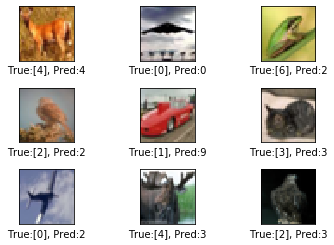

In [11]:
start = 110
end = start+10
pltu.plot_images(test[start:end],cls_test[start:end],cls_test_pred[start:end])

In [ ]:
plot_error_images